# TP : Classification Supervisée 
# Auteur : Hajar Rachid & Imane Rajif & Salma 
# Objectif : Manipuler trois algorithmes de classification supervisée : KNN, Arbre de décision et SVM

# Exercice 1 : Implémentation de l’algorithme KNN  

**Objectif :**  
Manipuler l’algorithme de classification supervisée *K-Nearest Neighbors (KNN)* pour reconnaître les chiffres manuscrits du dataset MNIST.  

**Principe :**  
L’algorithme KNN classe un point selon la majorité de ses *K voisins les plus proches*.  
> “Dis-moi qui sont tes voisins, je te dirai qui tu es !”


In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


###  Explication :
- **numpy, pandas** : pour la manipulation de données.  
- **matplotlib** : pour l’affichage des images.  
- **neighbors** : contient la classe `KNeighborsClassifier` pour créer le modèle KNN.  
- **fetch_openml** : permet de charger la base MNIST depuis `sklearn.datasets`.  
- **train_test_split** : pour séparer les données en train et test.  
- **accuracy_score** : pour évaluer la performance du modèle.


In [2]:
# Chargement du dataset MNIST
mnist = fetch_openml('mnist_784', version=1)

# Affichage de la taille du dataset
print("Taille du dataset (images, features):", mnist.data.shape)
print("Taille des labels :", mnist.target.shape)


Taille du dataset (images, features): (70000, 784)
Taille des labels : (70000,)


###  Explication :
- `fetch_openml('mnist_784')` : charge les 70 000 images de chiffres manuscrits (0 à 9).  
- Chaque image fait **28x28 pixels**, soit 784 valeurs.  
- `mnist.data` : contient les pixels.  
- `mnist.target` : contient les chiffres réels correspondants.


In [5]:

# Création d'un échantillon aléatoire de 5000 images
sample = np.random.randint(70000, size=5000)

# Sélection des données et des labels correspondants
data = pd.DataFrame(mnist.data.iloc[sample])
target = pd.Series(mnist.target.iloc[sample])

# Division en données d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=42)

print("Taille train :", x_train.shape)
print("Taille test :", x_test.shape)


Taille train : (4000, 784)
Taille test : (1000, 784)


### Explication :
On sélectionne **5000 images** aléatoires pour réduire le temps d’entraînement.  
- `np.random.randint(70000, size=5000)` : tire 5000 indices aléatoires parmi les 70 000.  
- `mnist.data.iloc[sample]` : sélectionne les images correspondantes.


In [6]:
# Division en données d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=42)
print("Taille train :", x_train.shape)
print("Taille test :", x_test.shape)


Taille train : (4000, 784)
Taille test : (1000, 784)


###  Explication :
- On divise les données en **80% pour l’entraînement** et **20% pour le test**.  
- `random_state=42` : pour obtenir toujours la même répartition (reproductibilité).


In [8]:
# Création du modèle KNN avec k = 3 (3 voisins les plus proches)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

# Entraînement du modèle
knn.fit(x_train, y_train)

# Prédiction sur les données de test
y_pred = knn.predict(x_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(" Précision du modèle KNN (k=3) :", round(accuracy * 100, 2), "%")


 Précision du modèle KNN (k=3) : 93.8 %


###  Explication :
- `KNeighborsClassifier(n_neighbors=3)` : on choisit **k=3 voisins**.  
- `fit()` : entraîne le modèle.  
- `predict()` : prédit les classes pour les données test.  
- `accuracy_score()` : compare les prédictions avec les vraies valeurs pour mesurer la précision.


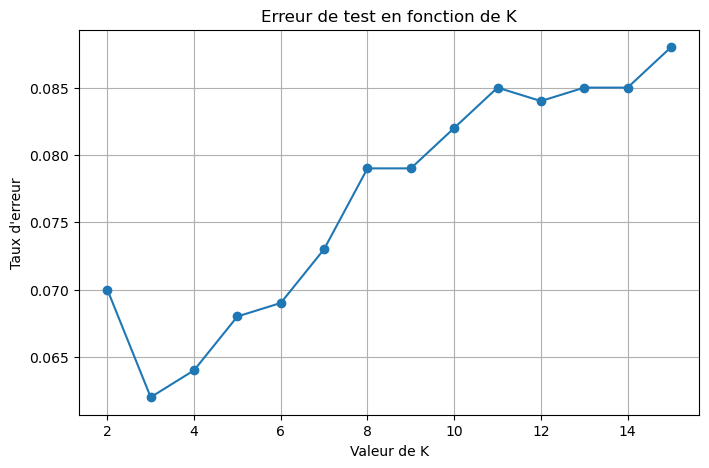

In [9]:
errors = []
k_values = range(2, 16)

for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    errors.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, errors, marker='o')
plt.title("Erreur de test en fonction de K")
plt.xlabel("Valeur de K")
plt.ylabel("Taux d'erreur")
plt.grid(True)
plt.show()


###  Explication :
- On teste **K** entre 2 et 15.  
- On calcule le **taux d’erreur** pour chaque valeur de K.  
- On trace la courbe pour visualiser quel K donne la meilleure performance.


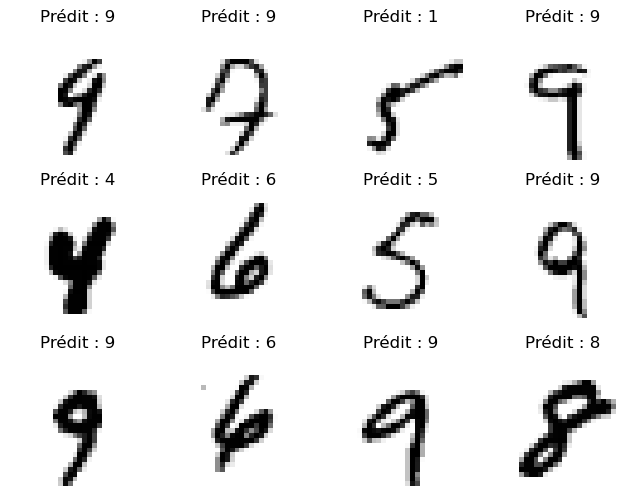

In [10]:
# Sélection aléatoire de 12 images pour visualiser les résultats
images = x_test.to_numpy().reshape((-1, 28, 28))
select = np.random.randint(images.shape[0], size=12)

fig, ax = plt.subplots(3, 4, figsize=(8, 6))
for index, value in enumerate(select):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(images[value], cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title('Prédit : {}'.format(y_pred[value]))
plt.show()


###  Explication :
- `reshape((-1, 28, 28))` : remet chaque vecteur à son image d’origine.  
- On affiche **12 images** avec leur **prédiction KNN**.  
- `plt.cm.gray_r` : affiche les images en niveaux de gris inversés.


# Exercice 2 : Les Arbres de Décision

**Objectif :**  
Apprendre à manipuler l’algorithme *Decision Tree Classifier* pour résoudre un problème de classification.

**Principe :**  
Un arbre de décision est une série de questions dont les réponses mènent à une décision.  
Chaque nœud représente une variable (x) et les feuilles contiennent la prédiction (y).


In [11]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


###  Explication :
- **pandas** : pour charger et manipuler les données.
- **DecisionTreeClassifier** : pour créer le modèle d’arbre de décision.
- **train_test_split** : pour diviser les données en train/test.
- **metrics** : pour mesurer la précision du modèle.
- **export_graphviz** : pour visualiser l’arbre.


In [15]:
# Remplacer les valeurs textuelles par des valeurs numériques
data_encoded = data.apply(lambda col: col.astype('category').cat.codes)

# Séparation des features et de la cible
X = data_encoded.iloc[:, :-1]
y = data_encoded.iloc[:, -1]

# Division en données d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###  Explication :
- `cat.codes` : convertit les valeurs textuelles en entiers (ex: "Yes" → 1, "No" → 0).  
- `X` : variables d’entrée (features).  
- `y` : variable de sortie (target).  
- `train_test_split` : 80% apprentissage / 20% test.


In [17]:
# Création du modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print(" Précision :", round(metrics.accuracy_score(y_test, y_pred) * 100, 2), "%")


 Précision : 100.0 %


### Explication :
- `DecisionTreeClassifier()` : crée un arbre de décision.  
- `fit()` : entraîne le modèle.  
- `predict()` : fait des prédictions.  
- `accuracy_score()` : compare les prédictions aux vraies valeurs.


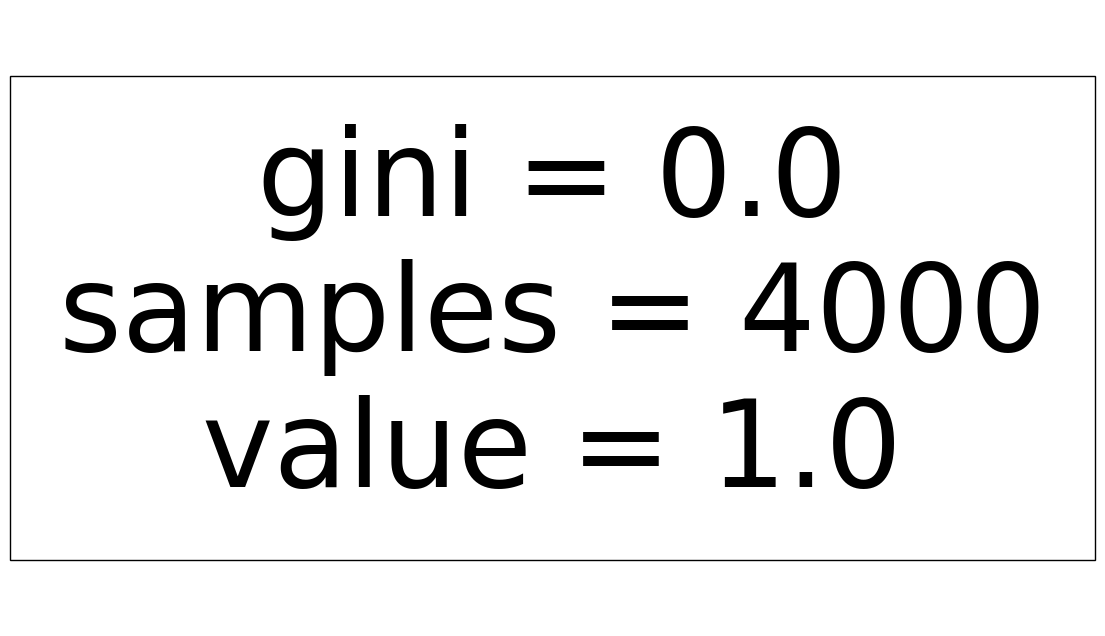

In [19]:
from sklearn import tree
plt.figure(figsize=(14, 8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Non embauché', 'Embauché'])
plt.show()


### Explication :
- `plot_tree()` : affiche la structure de l’arbre.  
- `filled=True` : colorie les nœuds selon la classe prédite.  
- On peut interpréter chaque chemin de la racine à une feuille comme une règle de décision.


# Exercice 3 : Algorithme SVM

**Objectif :**  
Utiliser le classifieur SVM pour distinguer des classes (ici : diagnostic du cancer du sein).

**Principe :**  
Le SVM sépare les classes à l’aide d’un hyperplan qui maximise la marge entre elles.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


###  Explication :
- **svm.SVC** : crée un modèle SVM.  
- **StandardScaler** : standardise les données (important pour SVM).  
- **datasets** : contient la base *breast_cancer*.


In [22]:
# Chargement de la base de données
data = datasets.load_breast_cancer()

print("Clés du dataset :", data.keys())
print("Classes :", data.target_names)
print("Description :", data.DESCR[:500], "...")

X = data.data
y = data.target


Clés du dataset : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Classes : ['malignant' 'benign']
Description : .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness ( ...


###  Explication :
La base **breast_cancer** contient :
- Des mesures sur des tumeurs (features)
- Une cible : *malignant (0)* ou *benign (1)*


In [23]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en données train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


###  Explication :
- `StandardScaler` : met toutes les valeurs sur la même échelle (moyenne=0, écart-type=1).
- C’est indispensable pour le bon fonctionnement du SVM.


In [25]:
# Modèle SVM linéaire
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print(" Précision du modèle linéaire :", round(metrics.accuracy_score(y_test, y_pred) * 100, 2), "%")
print("Matrice de confusion :\n", metrics.confusion_matrix(y_test, y_pred))


 Précision du modèle linéaire : 95.61 %
Matrice de confusion :
 [[41  2]
 [ 3 68]]


###  Explication :
- `kernel='linear'` : crée une frontière linéaire entre les classes.  
- `confusion_matrix` : montre les bonnes et mauvaises classifications.


In [27]:
# Modèle SVM polynomial
model_poly = svm.SVC(kernel='poly', degree=3)
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

print(" Précision du modèle polynomial :", round(metrics.accuracy_score(y_test, y_pred_poly) * 100, 2), "%")


 Précision du modèle polynomial : 86.84 %


###  Explication :
- `kernel='poly'` : crée un SVM avec un **noyau polynomial** (non linéaire).
- `degree=3` : ordre du polynôme.


In [29]:
# Modèle SVM Sigmoid
model_sigmoid = svm.SVC(kernel='sigmoid')
model_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = model_sigmoid.predict(X_test)

print(" Précision du modèle Sigmoid :", round(metrics.accuracy_score(y_test, y_pred_sigmoid) * 100, 2), "%")


 Précision du modèle Sigmoid : 94.74 %


###  Explication :
- `kernel='sigmoid'` : utilise une fonction sigmoïde pour séparer les classes.
- Moins performant que le linéaire ou polynomial dans ce dataset.


##  Conclusion Générale

**KNN :** Classe les éléments selon la majorité des voisins proches.  
**Arbre de Décision :** Apprend des règles logiques et explicatives.  
**SVM :** Sépare les classes en maximisant la marge entre elles.  

**Comparaison :**
- KNN → simple mais lent sur grands volumes.
- Decision Tree → facile à interpréter.
- SVM → performant sur données non linéaires.